In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
def head(X: list, n = 5) -> list:
    """
    return `n` (default is 5) first rows of a 2D list

    `X` : The 2D list
    `n` : number of first rows
    """
    return X[:n]

def tail(X: list, n = 5) -> list:
    """
    return `n` (default is 5) last rows of a 2D list

    `X` : The 2D list
    `n` : number of last rows
    """
    return X[(-n):]

In [4]:
purchaseData = pd.read_csv("Purchase_Logistic.csv")
X = purchaseData.iloc[:, [2,3]].values
Y = purchaseData.iloc[:,4].values
print(head(X))
print("Before Scaling, mean age =", X[:,0].mean(), ", mean salary =", X[:, 1].mean())
print(head(Y))

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
Before Scaling, mean age = 37.655 , mean salary = 69742.5
[0 0 0 0 0]


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("After Scaling, mean age =", X[:,0].mean(), ", mean salary =", X[:, 1].mean())

After Scaling, mean age = -7.105427357601002e-17 , mean salary = -1.7763568394002505e-17


In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.25,random_state=0)

In [7]:
cf = GaussianNB()
cf.fit(Xtrain, Ytrain)
Ypred = cf.predict(Xtest)
cmat = confusion_matrix(Ytest, Ypred)

Accuracy score: 90.0 %


<Axes: >

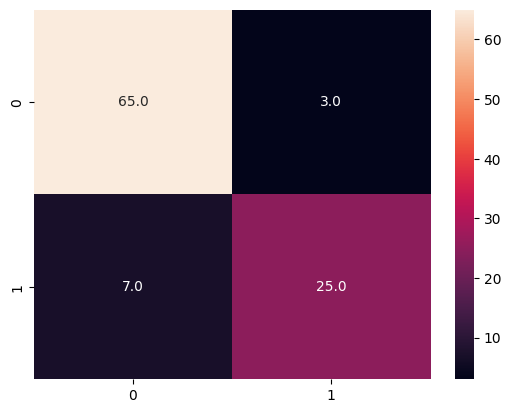

In [10]:
print("Accuracy score:", accuracy_score(Ytest,Ypred)*100,"%")
sns.heatmap(data=cmat, annot=True, fmt="1.1f")

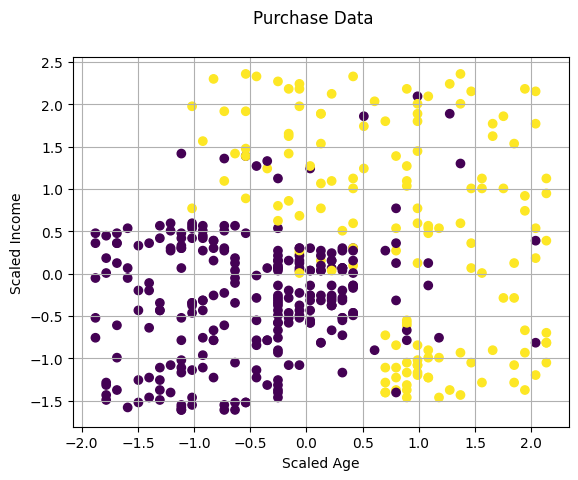

In [11]:
plt.figure(1);  
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.suptitle('Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

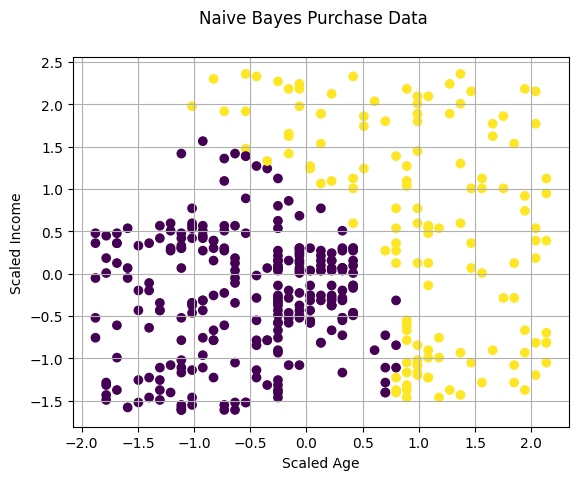

In [12]:
col = cf.predict(X)

plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c = col)
plt.suptitle('Naive Bayes Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()